In [41]:
import numpy as np
import matplotlib.pyplot as plt

Create a cubic function $y=X^{3}$

In [42]:
X=np.linspace(start=0.5,stop=4,num=10000)
y=np.power(X,3.0)
X=X.reshape(-1,1)
y=y.reshape(-1,1)

We know that a linear regressor can never approximate a cubic function so we engineer a new feature $X^{3}$

In [43]:
#X=np.column_stack([X,np.power(X,2.0)])

In [44]:
X

array([[ 0.5       ],
       [ 0.50035004],
       [ 0.50070007],
       ..., 
       [ 3.99929993],
       [ 3.99964996],
       [ 4.        ]])

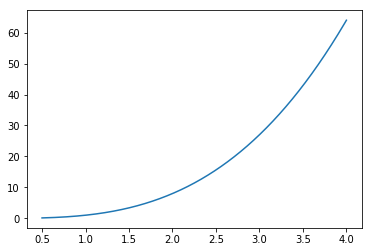

In [45]:
plt.plot(X[:,0],y)
plt.show()

In [46]:
def LR(X_train,X_test,y_train,y_test):
    from sklearn import linear_model
    clf = linear_model.LinearRegression()
    clf.fit(X_train, y_train)
    print_error(predict(clf,X_train),predict(clf,X_test),y_train,y_test,'LR')
    return clf

In [55]:
def ANN(X_train,X_test,y_train,y_test):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import np_utils
    m,input_layer_size=X_test.shape
    hidden_layer_size = input_layer_size   
    clf = Sequential()
    clf.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
    clf.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    clf.add(Dense(units = 1, kernel_initializer = 'normal'))
    clf.compile(loss='mean_squared_error', optimizer='adam')
    print("Shapes of y_test, y_prediction ",predict(clf,X_test).shape,y_test.shape)
    history=clf.fit(X_train, y_train, batch_size = 1000, epochs = 1000,verbose=0)
    print_error(predict(clf,X_train),predict(clf,X_test),y_train,y_test,'ANN')
    return clf

In [56]:
def split_test_train_val(X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.1,random_state = 0)
    X_test, X_val,y_test,y_val =  train_test_split(X_test,y_test,test_size=0.1,random_state = 0)
    return X_train,X_test,X_val,y_train,y_test,y_val

In [57]:
def print_error(train,test,target_train,target_test,parameter):
    print("Mean squared error on training set using ",parameter,np.mean((train-target_train)**2))
    print("Mean squared error on test set using  ",parameter,np.mean((test-target_test)**2))

In [58]:
def plot_comparision(prediction,target,output):
    from sklearn import linear_model
    plt.plot(target,prediction,'.')
    plt.plot([0,np.max(target)],[0,np.max(target)],color='k', linestyle='-')
    plt.xlabel("Observation")
    plt.ylabel("Prediction")
    plt.savefig(output,bbox_inches='tight')
    plt.show()

In [59]:
def predict(clf, input_features):
    prediction=clf.predict(input_features).reshape(-1,1)
    return prediction

In [60]:
X_train,X_test,X_val,y_train,y_test,y_val=split_test_train_val(X,y)

Mean squared error on training set using  LR 38.6785705028
Mean squared error on test set using   LR 37.6818503571


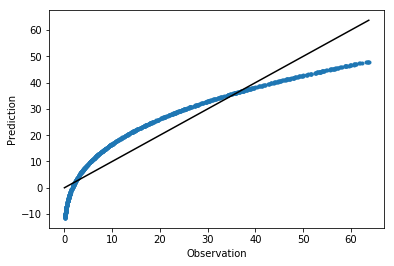

In [61]:
clf_LR=LR(X_train,X_test,y_train,y_test);
plot_comparision(predict(clf_LR,X_test),y_test,'test.pdf')

Shapes of y_test, y_prediction  (900, 1) (900, 1)
Mean squared error on training set using  ANN 0.0146137439238
Mean squared error on test set using   ANN 0.0147186364605


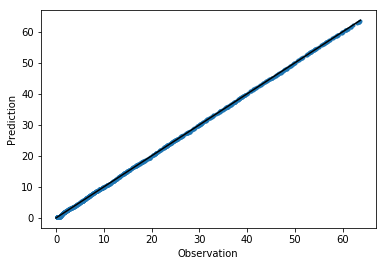

In [62]:
clf_ANN=ANN(X_train,X_test,y_train,y_test);
plot_comparision(predict(clf_ANN,X_test),y_test,'test.pdf')